In [28]:
import h5py
import numpy as np
import umap
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsTransformer
import seaborn as sns
import pandas as pd

In [2]:
f = h5py.File('./data/TNG/fof_subhalo_tab_099.0.hdf5','r')
f.keys()

<KeysViewHDF5 ['Config', 'Group', 'Header', 'IDs', 'Parameters', 'Subhalo']>

In [3]:
f['Subhalo'].keys()

<KeysViewHDF5 ['SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetalli

In [4]:
f = h5py.File('./data/TNGS/Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc_025.hdf5','r')
f.keys()

<KeysViewHDF5 ['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc', 'subhaloIDs']>

In [5]:
Mu = f['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:,0,0]

In [6]:
Mg = f['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:,1,0]

In [7]:
Mr = f['Subhalo_StellarPhot_p07c_cf00dust_res_conv_ns1_rad30pkpc'][:,2,0]

In [8]:
data = pd.DataFrame( np.c_[Mu,Mg,Mr], columns=['Mu','Mg','Mr'])
data

,Mu,Mg,Mr
0,-23.009825,-23.944378,-24.091721
1,-23.098206,-23.676973,-23.725281
2,-20.821779,-21.716763,-21.970669
3,-21.093365,-21.901186,-22.060453
4,-22.270887,-22.840668,-22.914812
...,...,...,...
5828779,NaN,NaN,NaN
5828780,NaN,NaN,NaN
5828781,NaN,NaN,NaN
5828782,NaN,NaN,NaN


In [9]:
data = data.dropna()
data

,Mu,Mg,Mr
0,-23.009825,-23.944378,-24.091721
1,-23.098206,-23.676973,-23.725281
2,-20.821779,-21.716763,-21.970669
3,-21.093365,-21.901186,-22.060453
4,-22.270887,-22.840668,-22.914812
...,...,...,...
5741989,-9.685097,-10.738990,-11.031914
5752425,-10.555978,-11.495926,-11.588413
5781179,-10.530910,-11.513864,-11.694643
5794107,-9.932335,-10.972361,-11.222184


In [10]:
data_scaler =  StandardScaler().fit_transform(data[::100])

In [15]:
model = umap.UMAP(metric='cosine', n_neighbors=5, min_dist=0.2)

In [16]:
embed = model.fit_transform(data_scaler)

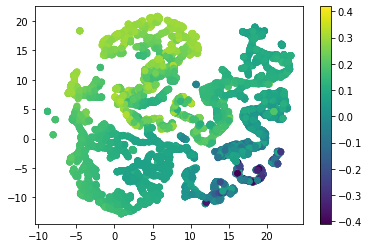

In [22]:
pl.scatter(embed[:,0],embed[:,1], c=(data['Mg']-data['Mr'])[::100])
pl.colorbar()

In [29]:
classifier = KNeighborsTransformer(n_neighbors=5)

In [32]:
a = classifier.fit_transform(embed)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

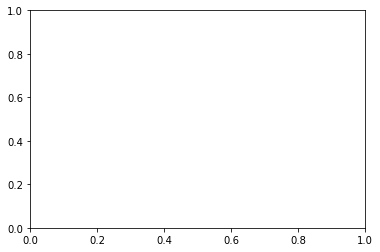